In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
# Reading the csv
vehicle_recommendation_df = pd.read_csv(r"C:\Users\Lenovo\Dropbox\PC\Desktop\Files\Kaggle\in+vehicle+coupon+recommendation\vehicle_recommendation_consolidated.csv")
vehicle_recommendation_df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
#Checking if data is balanced
vehicle_recommendation_df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [7]:
# Data is slightly imbalanced, we will oversample to balance the data
X = vehicle_recommendation_df.drop(columns=['Y'])
y = vehicle_recommendation_df['Y']

oversample = SMOTE(random_state=332)

X, y = oversample.fit_resample(X, y)

1    7210
0    7210
Name: Y, dtype: int64

In [8]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4556)

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=400, random_state=332)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=400, random_state=332)

In [31]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7323162274618585


In [52]:
import xgboost as xgb

# Assuming your training data is stored in X_train and corresponding labels in y_train

# Convert your data into the DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Set the hyperparameters for the XGBoost model
params = {
    'objective': 'binary:logistic',  # Binary classification objective
    'eval_metric': 'logloss',  # Evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 30,  # Maximum depth of each tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.9,  # Subsample ratio of features
    'seed': 42  # Random seed for reproducibility
}

num_boost_round = 250  # Number of boosting rounds (trees) to train

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

# Once the model is trained, you can use it to make predictions on test data

# Assuming your test data is stored in X_test
dtest = xgb.DMatrix(X_test)

# Make predictions using the trained model
predictions = model.predict(dtest)

# If you have binary labels (0/1) in your test data, you can convert probabilities to class labels
predicted_labels = [1 if p >= 0.5 else 0 for p in predictions]

In [53]:
# Assuming your true labels are stored in y_test
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8037447988904299


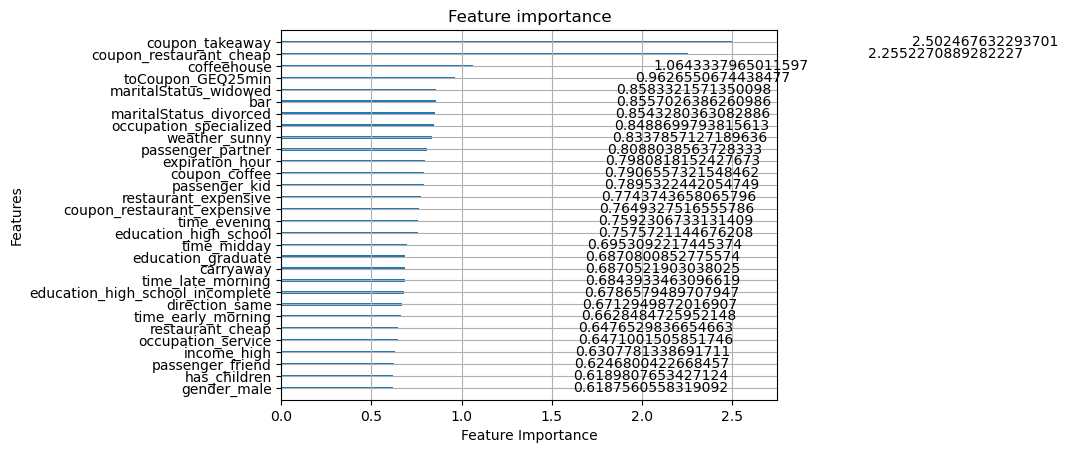

In [56]:
import matplotlib.pyplot as plt

# Assuming your trained XGBoost model is stored in the 'model' variable

# Plot feature importance
xgb.plot_importance(model, importance_type='gain', xlabel='Feature Importance', max_num_features=30)
plt.show()

In [21]:
from sklearn.svm import SVC

# Assuming your training data is stored in X_train and corresponding labels in y_train
# Assuming your test data is stored in X_test and corresponding labels in y_test

# Initialize the SVM model
model = SVC(kernel='rbf', random_state=42)  # Using the radial basis function (RBF) kernel

# Train the SVM model
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7319694868238558
